# Cvičení 2: Zvukové Signály a Fourierova Transformace

---
## Část 1: Úvod do Zvukových Signálů



#### Co je to Zvukový Signál v Počítači

Zvukový signál v počítači je digitální reprezentace akustických vln. Tyto vlny jsou typicky zachycen a převeden do digitální formy pomocí procesu zvaného analogově-digitální konverze (ADC). V digitální formě je zvukový signál reprezentován jako série vzorků, kde každý vzorek představuje amplitudu zvukové vlny v určitém časovém okamžiku.

- **Perioda (T)**: Doba, která uplyne mezi opakováními stejné fáze vlny. Její vzorec je $ T = \frac{1}{f} $, kde $ f $ je frekvence.
- **Frekvence (f)**: Počet opakování (period) vlny za sekundu. Vyjadřuje se v hertzech (Hz). Vzorec pro frekvenci je $ f = \frac{1}{T} $.
- **Vzorkovací Frekvence**: Počet vzorků zvukového signálu získaných za sekundu. Vysoká vzorkovací frekvence umožňuje přesnější reprezentaci zvukové vlny.

#### Příklad Kódu: Vytvoření Zvukového Signálu v Pythonu s Použitím Numpy

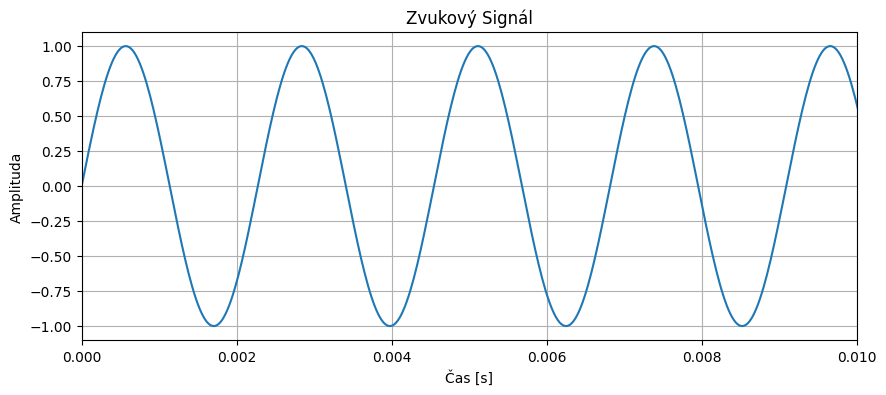

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry signálu
frekvence = 440  # Frekvence v Hz (A4 tón)
vzorkovaci_frekvence = 44100  # Vzorkovací frekvence v Hz
trvani = 1  # Trvání signálu v sekundách

# Generování časové osy
t = np.linspace(0, trvani, int(vzorkovaci_frekvence * trvani), endpoint=False)

# Generování signálu
signal = np.sin(2 * np.pi * frekvence * t)

# Vykreslení signálu
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title("Zvukový Signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()

##### Ukázka přehrávání zvuku v Pythonu

In [3]:
from IPython.display import Audio

Audio(signal, rate=vzorkovaci_frekvence)


#### 1.1: Složení Zvukového Signálu z Více Vln

---

#### Zvukový Signál Složený z Vícero Vln

V reálném světě nejsou zvukové signály obvykle tvořeny jednou sinovou vlnou, ale jsou složením několika vln s různými frekvencemi, amplitudami a různými fázemi. Každý zvuk, který slyšíme, může být rozložen na sérii sinových nebo kosinových vln různých frekvencí, amplitud a fází. 

$$x = a_1 \sin (b_1 2 \pi x + c_1) + a_2 \sin (b_2 2 \pi x + c_2) + \ldots$$ 
- $a_n$ je amplituda $n$-té vlny
- $b_n$ je frekvence $n$-té vlny
- $c_n$ je fáze $n$-té vlny

#### Příklad Kódu: Vytvoření Složeného Zvukového Signálu

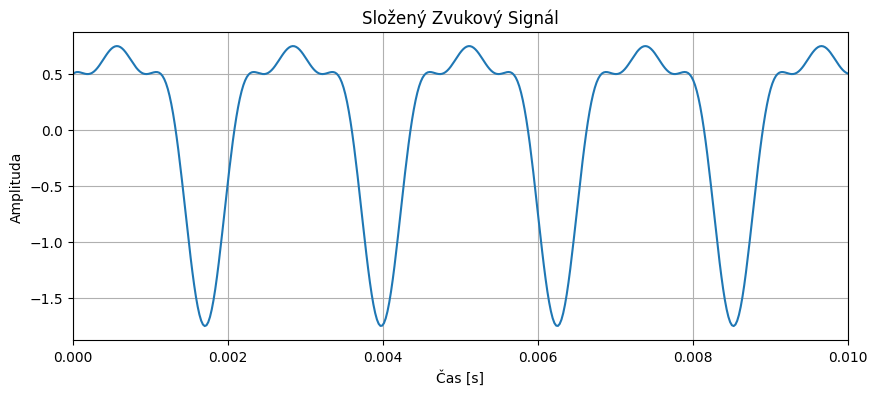

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry signálu
vzorkovaci_frekvence = 44100  # Vzorkovací frekvence v Hz
trvani = 1.0  # Trvání signálu v sekundách

# Amplitudy komponent
amplitudy_komponent = [1.0, 0.5, 0.25]  # Amplitudy (1, 0.5, 0.25)

# Frekvence komponent
frekvence_komponent = [440, 880, 1320]  # Frekvence v Hz (A4, A5, E6)

# Fázové posuny komponent
fazove_posuny_komponent = [0, np.pi / 2, np.pi]  # Fázové posuny (0, pi/2, pi)

# Generování časové osy
t = np.linspace(0, trvani, int(vzorkovaci_frekvence * trvani), endpoint=False)

# Generování složeného signálu
signal = np.zeros_like(t)

#  zip sloučí seznamy do jednoho seznamu pro jednodušší iteraci
for a, f, p in zip(amplitudy_komponent, frekvence_komponent, fazove_posuny_komponent):
    signal += a * np.sin(2 * np.pi * f * t + p)

# Vykreslení signálu
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title("Složený Zvukový Signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.show()

#### Opět přehrajeme zvuk v Pythonu

In [5]:
from IPython.display import Audio

Audio(signal, rate=vzorkovaci_frekvence)

#### 1.2: Jak vypadá skutečný zvukový signál?

Ze souboru A4.waw nahrajeme náhrávku zvuku noty na klavíru a zobrazíme si její graf.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Načtení WAV souboru
audio_path = 'A4.wav'
vzorkovaci_frekvence, signal = wavfile.read(audio_path)

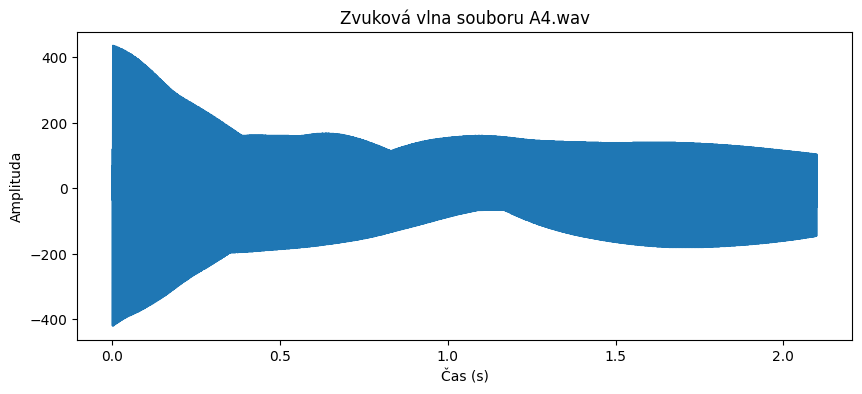

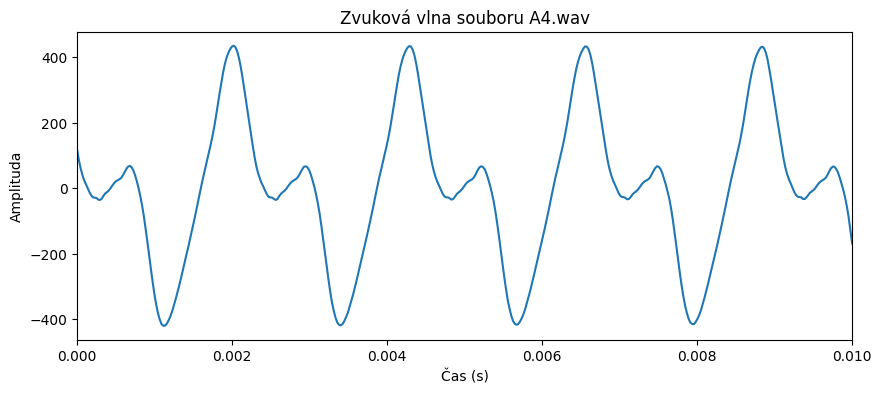

In [8]:
# Výpočet délky zvuku v sekundách
delka_nahravky = len(signal) / vzorkovaci_frekvence

# Generování časové osy
casova_osa= np.linspace(0, delka_nahravky, len(signal))

# Vykreslení zvukové vlny
plt.figure(figsize=(10, 4))
plt.plot(casova_osa, signal)
plt.title('Zvuková vlna souboru A4.wav')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.show()

# Ještě jednou, ale s omezeným rozsahem
plt.figure(figsize=(10, 4))
plt.plot(casova_osa, signal)
plt.xlim(0, 0.01)  # Zobrazení pouze prvních 10 ms, jinak bychom moc nepoznali
plt.title('Zvuková vlna souboru A4.wav')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.show()

Opět přehrajeme zvuk v Pythonu.

In [10]:
from IPython.display import Audio

Audio(signal, rate=vzorkovaci_frekvence)

---
## Část 2: Úvod do Fourierovy Transformace
#### Co Je Fourierova Transformace

Fourierova transformace je matematický nástroj, který umožňuje rozložit složený zvukový signál na jednotlivé sinové a kosinové vlny různých frekvencí. Tento proces nám pomáhá pochopit, jaké frekvenční komponenty jsou v signálu přítomny. Fourierova transformace je klíčová pro analýzu zvukových signálů, protože umožňuje identifikovat a oddělit různé zvukové tóny a harmonické komponenty.

#### Vzorec pro Fourierovu Transformaci

Fourierova transformace $ F(\omega) $ signálu $ x(t) $ je definována vzorcem:

$$ F(\omega) = \int_{-\infty}^{\infty} x(t) e^{-i 2 \pi \omega t} dt $$

kde:
- $ F(\omega) $ je Fourierova transformace signálu.
- $ x(t) $ je původní signál v čase.
- $ \omega $ je frekvence (v Hz).
- $ e^{-i  2 \pi \omega t} $ je komplexní exponenciála, která může být rozložena na sinovou a kosinovou část.

#### Rozklad na sinovou a Kosinovou Část

Komplexní exponenciála $ e^{-i  2 \pi \omega t} $ může být rozložena pomocí Eulerova vzorce na sinovou a kosinovou část:

$$ e^{-i  2 \pi \omega t} = \cos( 2 \pi \omega t) - i \sin( 2 \pi \omega t) $$

Takže Fourierova transformace se dá chápat jako kombinace integrací přes kosinové a sinové komponenty signálu.

#### Krátké Vysvětlení Komplexních Čísel

Komplexní čísla jsou rozšířením reálných čísel a obsahují "imaginární" jednotku $ i $, pro kterou platí $ i^2 = -1 $. Každé komplexní číslo má reálnou část a imaginární část. V kontextu Fourierovy transformace, komplexní čísla umožňují efektivní reprezentaci oscilací a fázových vztahů signálu. Imaginární část se týká sinových komponent, zatímco reálná část se týká kosinových komponent.

### Zjednodušení pro praktické použití

Předpokládejme, že náš signál trvá pouze 1 sekundu, tj. $ x(t) = 0 $  kdekoliv mimo interval $ t \in [0, 1] $. Dále si rozdělme výstup Fourierovy transformace na reálnou (kosinovou) a imaginární (sinovou) část:

$$ F_{\cos}(\omega) = \int_{0}^{1} x(t) \cos( 2 \pi \omega t) dt $$

$$ F_{\sin}(\omega) = - \int_{0}^{1} x(t) \sin( 2 \pi \omega t) dt $$

Nyní pokud chceme například zjistit jaké zastoupení má frekvence 3 Hz v našem signálu (její kosinová a sinová komponenta), stačí nám vypočítat:

$$ F_{\cos}(3) = \int_{0}^{1} x(t) \cos( 2 \pi 3 t) dt $$
$$ F_{\sin}(3) = - \int_{0}^{1} x(t) \sin( 2 \pi 3 t) dt $$



Ukážeme si to nejprve na jednoduchém příkladu, kde signál $ x(t) $ je sinová vlna s frekvencí 3 Hz.

Nejprve si ukážeme jak vypadá určení různých frekvenčních komponent (2Hz, 3Hz, 4Hz).

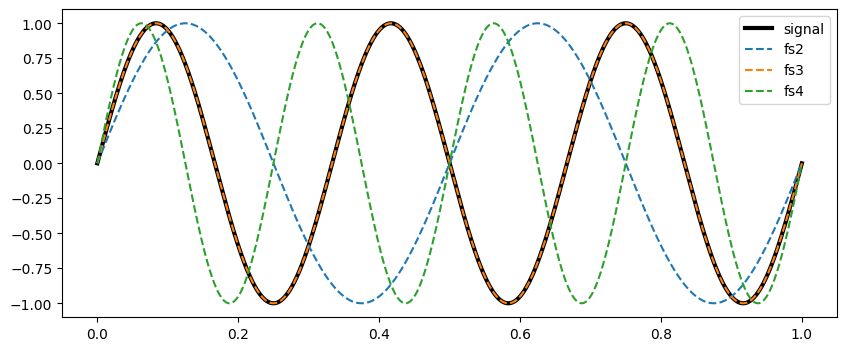

In [11]:
# vyrobení signálu a příslušných sinusoid pro frekvence 2, 3 a 4 Hz
t = np.linspace(0, 1, 44100, endpoint=False)
signal = np.sin(2 * np.pi * 3 * t)
fs2 = np.sin(2 * np.pi * 2 * t)
fs3 = np.sin(2 * np.pi * 3 * t)
fs4 = np.sin(2 * np.pi * 4 * t)

# vykreslení signálu a příslušných sinusoid
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="signal", linewidth=3, color='black')
plt.plot(t, fs2, label="fs2", linestyle='dashed')
plt.plot(t, fs3, label="fs3", linestyle='dashed')
plt.plot(t, fs4, label="fs4", linestyle='dashed')
plt.legend()
plt.show()

Integrál je pouze plocha pod křivkou, ukážeme si její vizualizaci.

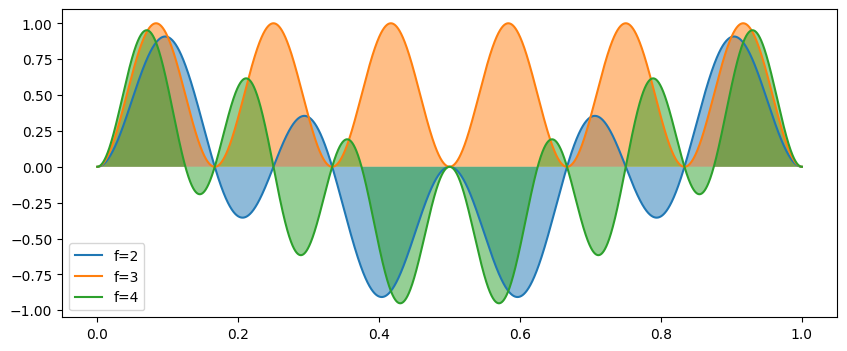

In [12]:
plt.figure(figsize=(10, 4))

# grafy signálu přenásobeného frekvencí a plochy pod ním
plt.plot(t, signal*fs2, label="f=2")
plt.fill_between(t, signal * fs2, alpha=0.5)

plt.plot(t, signal*fs3, label="f=3")
plt.fill_between(t, signal * fs3, alpha=0.5)

plt.plot(t, signal*fs4, label="f=4")
plt.fill_between(t, signal * fs4, alpha=0.5)

plt.legend()
plt.show()

Plochu pod křivkou můžeme spočítat numericky pomocí funkce `trapz`  která spojí body lomenou čarou a spočítá plochu pod ní.

Formát f-string (`f"Text{promenna}"`) je způsob formátování řetězců v jazyce Python. Pomocí fstring můžeme vkládat hodnoty proměnných do řetězců a specifikovat jejich formátování.

Symbol `:` v fstringu označuje začátek formátovacího specifikátoru. Následuje specifikátor formátu, který určuje, jak bude hodnota proměnné zobrazena v řetězci.

Specifikátor `:.5f` je jedním z možných specifikátorů formátu. Znamená, že číselná hodnota bude zobrazena jako desetinné číslo s plovoucí řádovou čárkou a bude mít 5 desetinných míst.

Například, pokud máme proměnnou `x` s hodnotou `3.141592653589793`, a použijeme fstring s formátovacím specifikátorem `:.5f`, výsledný řetězec bude `"3.14159"`.

In [13]:
print(f"Pro frekvenci 2Hz je plocha pod křivkou {np.trapz(signal*fs2, t):.5f}.")
print(f"Pro frekvenci 3Hz je plocha pod křivkou {np.trapz(signal*fs3, t):.5f}.")
print(f"Pro frekvenci 4Hz je plocha pod křivkou {np.trapz(signal*fs4, t):.5f}.")

Pro frekvenci 2Hz je plocha pod křivkou -0.00000.
Pro frekvenci 3Hz je plocha pod křivkou 0.50000.
Pro frekvenci 4Hz je plocha pod křivkou -0.00000.


**Nyní si ukážeme jak bychom mohli vypočítat Fourierovu transformaci (její hodnoty v jednotlivých frekvencích v celočíselných Hz) pro testovací signál.**


In [14]:
# časová osa na [0, 1) s
t = np.linspace(0, 1, 44100, endpoint=False)

# signál jakožto kombinace sinusoid s různými frekvencemi, amplitudami a fázovými posuny

frekvence = [120, 333, 440]
amplitudy = [2, 1.5, 0.75]
fazove_posuny = [np.pi / 3, np.pi / 2, np.pi]

signal = np.zeros_like(t)

for f, a, p in zip(frekvence, amplitudy, fazove_posuny):
    signal += a * np.cos(2 * np.pi * f * t + p)

In [15]:
# spočteme Fourierovu transformaci for celočíselné frekvence od 1 do 499
omega_array = np.arange(1, 500)

sinova_cast = np.zeros_like(omega_array, dtype=float)
kosinova_cast = np.zeros_like(omega_array, dtype=float)

for i, omega in enumerate(omega_array):
    f_sin = -np.sin(2 * np.pi * omega * t)
    f_cos = np.cos(2 * np.pi * omega * t)
    sinova_cast[i] = np.trapz(signal * f_sin, t)
    kosinova_cast[i] = np.trapz(signal * f_cos, t)

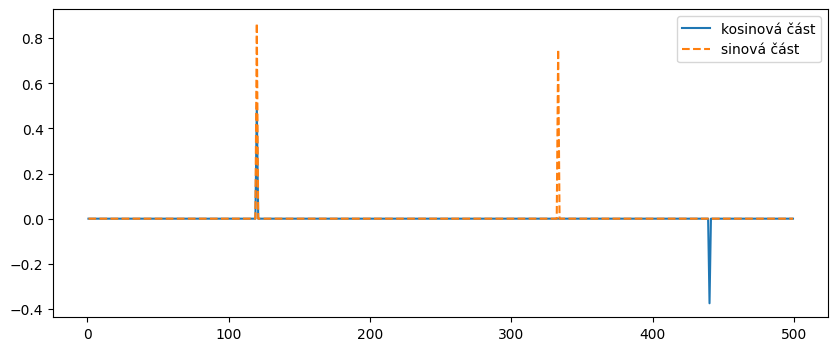

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(omega_array, kosinova_cast, label="kosinová část")
plt.plot(omega_array, sinova_cast, label="sinová část", linestyle='dashed')
plt.legend()
plt.show()

Které frekvence jsou v signálu přítomny?

- `np.where` vrací indexy prvků, které splňují podmínku (konkrétně list indexů v jednotlivých dimenzích - zde pouze jeden neboť se jedná o vektor).

In [18]:
# [0] -> chceme souřadnice v 1. dimenzi
idx = np.where(sinova_cast**2 + kosinova_cast**2 > 1e-6)[0] 
print(f"Nezanedbatelné jsou pouze frekvence {omega_array[idx]}.")

Nezanedbatelné jsou pouze frekvence [120 333 440].


Zkusíme z těchto výsledků dopočítat parametry původního signálu.

Pomůže nám k tomu obrázek.

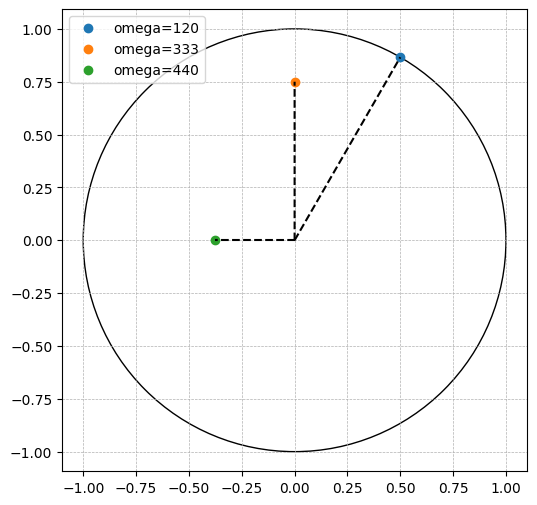

In [19]:
plt.figure(figsize=(6, 6))

for i in idx:
    plt.plot(kosinova_cast[i], sinova_cast[i], 'o', label=f"omega={omega_array[i]}")
    plt.plot([0, kosinova_cast[i]], [0, sinova_cast[i]], 'k--')

# Add unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_patch(circle)

# Set axis scale to be equal
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(-1, 1.25, 0.25))
plt.yticks(np.arange(-1, 1.25, 0.25))
plt.legend()

Zopakujme, si jaké bylo zadání:
```
frekvence = [120, 333, 440]
amplitudy = [2, 1.5, 0.75]
fazove_posuny = [np.pi / 3, np.pi / 2, np.pi]
```
Tedy:
- amplituda je 2x vzdálenost od středu k vrcholu
- fázový posun je rotace o daný úhel z bodu (1, 0)

**Proč je amplituda 2x vzdálenost od středu k vrcholu?**
- ve skutečnosti Fourierova transformace $ F(\omega) $ je i pro záporná $\omega$ (tj. pro záporné frekvence).
- tedy budou přítomy i záporné frekvence [-120, -333, -440] které budou mít stejnou amplitudu jako kladné frekvence -> tedy polovinu skutečné amplitudy.

### Jak to funguje v praxi?
Použitý postup je poměrně neefektivní, v praktických aplikacích (komprese zvuku, obrazu,...) se Fourierova transformace počítá tisíce až miliony krát za vteřinu (a to i na zařízeních, které se vám vejdou na zápěstí). Proto se používají "chytré" implementace, které využívají vlastností Fourierovy transformace a výpočet urychlují. Nejznámější je tzv. Fast Fourier Transform (FFT), která využívá symetrie a periodičnosti sinových a kosinových funkcí.

**A samozřejmě je její implementace v knihovně numpy.**

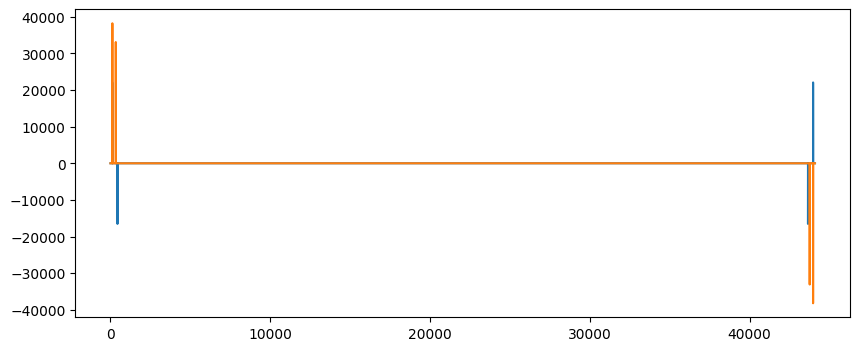

In [20]:
fft_result = np.fft.fft(signal)

plt.figure(figsize=(10, 4))
plt.plot(np.real(fft_result))
plt.plot(np.imag(fft_result))
plt.show()

**Co to vlastně vidíme?**

- Fourierova transformace pro diskrétní vektor vrací vektor komplexních čísel o stejné délce.
- Reálná část odpovídá kosinové složce.
- Imaginární část odpovídá sinové složce.
- Ale je středově symetrická vůči středu vektoru.

Symetrie ve výsledcích diskrétní Fourierovy transformace (DFT) pro reálné signály je důsledkem jejích matematických vlastností a toho, že je vstupní signál zcela reálný

Pro $N$-bodovou ($N$ je délka vstupního signálu) DFT, výsledné spektrum $ X[k] $ pro $ k = 0, 1, ..., N-1 $ je vypočítáno z diskrétního signálu $ x[n] $ pomocí vztahu:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-\frac{i2\pi kn}{N}}.
$$


Rozložení $ X[k] $ na reálnou a imaginární složku je stejné jako předtím:

- Reálná složka: $ \text{Re}(X[k]) = \sum_{n=0}^{N-1} x[n] \cdot \cos\left(\frac{2\pi kn}{N}\right) $
- Imaginární složka: $ \text{Im}(X[k]) = -\sum_{n=0}^{N-1} x[n] \cdot \sin\left(\frac{2\pi kn}{N}\right) $

Symetrie v DFT pro reálné signály se projevuje tak, že pro $ k > \frac{N}{2} $, platí následující vztahy:

- $ \text{Re}(X[k]) = \text{Re}(X[N-k]) $
- $ \text{Im}(X[k]) = -\text{Im}(X[N-k]) $

Tato symetrie je důsledkem toho, že sinové a kosinové funkce, které se využívají v DFT, mají specifické periodické a symetrické vlastnosti. Pro reálné vstupní signály jsou tyto vlastnosti zrcadleny ve výsledcích DFT.

**Takže jak z výsledků DFT získáme kosínové a sinové složky v závislosti na frekvenci?**
- `np.fft.fftfreq` vrací frekvence odpovídající jednotlivým prvkům výsledku DFT.

Kdybychom toto chtěli udělat ručně, museli bychom si vypočítat frekvence odpovídající jednotlivým prvkům výsledku DFT zvlášť pro kladnou (první polovina výsledku) a zápornou (druhá polovina výsledku) frekvenci.

Pro klaďnou frekvenci bychom použili vzorec:
``` 
N = len(signal)
vzorkovaci_frekvence = 44100
freq = np.arange(N//2) / N * vzorkovaci_frekvence

```


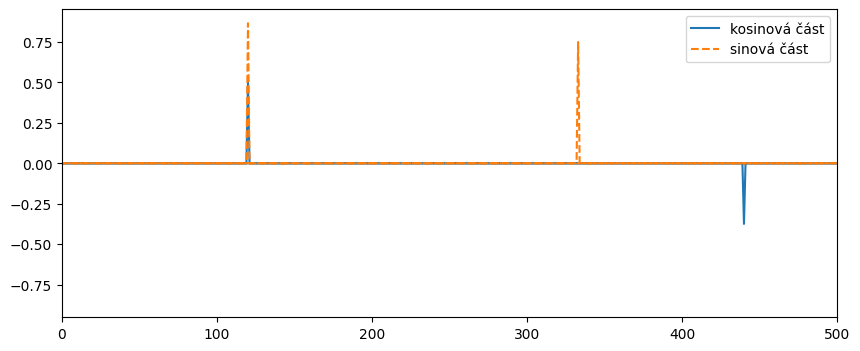

In [21]:
# Vypočítání DFT signálu
N = len(signal)
vzorkovaci_frekvence = 44100

fft_result = np.fft.fft(signal)


# Frekvence pro každý bod DFT
freqs = np.fft.fftfreq(N, d=1 / vzorkovaci_frekvence)

# Rozdělení DFT výsledku na reálnou a imaginární složku
kosinova_cast = fft_result.real/N
sinova_cast = fft_result.imag/N

plt.figure(figsize=(10, 4))
plt.plot(freqs, kosinova_cast, label="kosinová část")
plt.plot(freqs, sinova_cast, label="sinová část", linestyle='dashed')
plt.legend()
plt.xlim(0, 500)
plt.show()

### Jak tedy vypadá spektrum noty A4 z našeho příkladu?


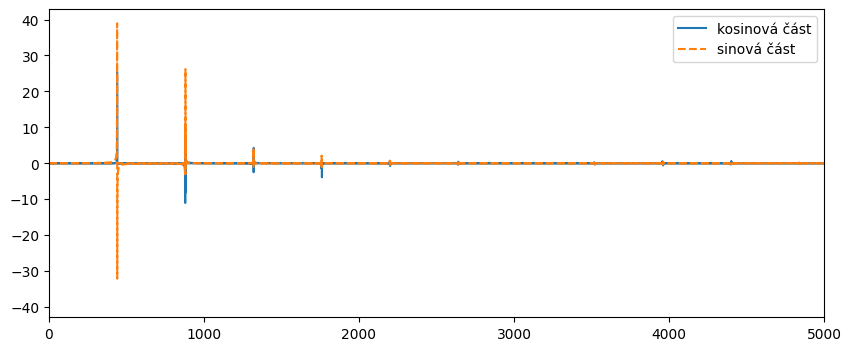

In [22]:
# Načtení WAV souboru
audio_path = 'A4.wav'
vzorkovaci_frekvence, signal = wavfile.read(audio_path)
    
# Vypočítání DFT signálu
N = len(signal)

fft_result = np.fft.fft(signal)


# Frekvence pro každý bod DFT
freqs = np.fft.fftfreq(N, d=1 / vzorkovaci_frekvence)

# Rozdělení DFT výsledku na reálnou a imaginární složku
kosinova_cast = fft_result.real / N
sinova_cast = fft_result.imag / N

plt.figure(figsize=(10, 4))
plt.plot(freqs, kosinova_cast, label="kosinová část")
plt.plot(freqs, sinova_cast, label="sinová část", linestyle='dashed')
plt.legend()
plt.xlim(0, 5000)
plt.show()

Vidíme základní frekvenční složku (440Hz) a její harmonické frekvence (její násobky).

## Část 3: Okenní Fourierova Transformace

#### Co je to Okenní Fourierova Transformace
Pokud máme delší zvukový signál, který obsahuje různé tóny v různých časových sekcích, nebude nám stačit jednoduchá Fourierova transformace. Dala by nám totiž pouze celkový pohled na signál bez informace o čase výskytů jednotlivých frekvencí. Okenní Fourierova transformace (WFT) je způsob, jak získat frekvenční složky signálu v čase. 

WFT je vlastně Fourierova transformace aplikovaná na krátké časové úseky signálu. Výsledkem je 2D matice, která obsahuje frekvenční složky signálu v čase.

Tedy:
- vybereme si ze signálu sérii stejně dlouhých krátkých úseků (okének)
    - můžeme signál pouze rozdělit, ale můžeme také použít překryv okének
    - obvykle definujeme `velikost_okna` a `posun_okna`
    - také je možné použít různé funkce pro "ořezávání" okének, tedy nevyřezávat ze signálu dle obdelníkové šablony, ale použít libovolnou jinou šablonu (např. Hammingovo okno)
- na každé okénko aplikujeme Fourierovu transformaci
- výsledkem je matice, kde na ose x je čas a na ose y jsou frekvence
- **pozor, čím lepší indentifikace v čase = menší velikost okna, tím horší identifikace ve frekvencích (menší rozlišení na ose y) a samozřejmě naopak**

In [23]:
# načteme data ze souboru
vzorkovaci_frekvence, signal = wavfile.read('butterfly.wav')
delka_nahravky = len(signal) / vzorkovaci_frekvence
print(f"Vzorkovací frekvence: {vzorkovaci_frekvence} Hz")
print(f"Délka nahrávky: {delka_nahravky:.2f} s")

Vzorkovací frekvence: 44100 Hz
Délka nahrávky: 7.00 s


Přehrajeme si zvukový signál.

In [24]:
from IPython.display import Audio

Audio(signal, rate=vzorkovaci_frekvence)


Zvolíme si velikost okna a posun okna (zatím zůstaneme u obdelníkového okna).

Můžeme to udělat v sekundách a použít vzorkovací frekvenci pro výpočet počtu vzorků v okně a posunu okna. 

In [25]:
delka_okna_sekundy = 0.1
posun_okna_sekundy = 0.01

velikost_okna = int(delka_okna_sekundy * vzorkovaci_frekvence)
posun_okna = int(posun_okna_sekundy * vzorkovaci_frekvence)

print(f"Velikost okna: {velikost_okna}")
print(f"Posun okna: {posun_okna}")

Velikost okna: 4410
Posun okna: 441


Provedeme rozbití signálu na okénka a zároveň spočítáme jejich Fourierovu transformaci.

**Jelikož ná zajímají pouze amplitudy pro jednotlivé frekvence, můžeme přímo počítat a ukládat je.**
- `np.abs` vrací absolutní hodnotu komplexního čísla (tj. vzdálenost od nuly v komplexní rovině).
- jednotlivé výsledky budeme ukládat do listu

In [26]:
N = len(signal)

zacatek_okna = 0
konec_okna = velikost_okna

okeni_fft = []

pocet_oken = 0

while konec_okna <= N:
    okno = signal[zacatek_okna:konec_okna]
    okeni_fft.append(np.abs(np.fft.rfft(okno) / velikost_okna))
    zacatek_okna += posun_okna
    konec_okna += posun_okna
    pocet_oken += 1
    
print(f"Počet okének: {pocet_oken}")
print(f"Počet hodnot na frekvenční ose: {velikost_okna // 2}")

Počet okének: 691
Počet hodnot na frekvenční ose: 2205


Matici můžeme z listu vektorů vytvořit pomocí funkce `np.stack`.

Rozměry matice: (2206, 691)


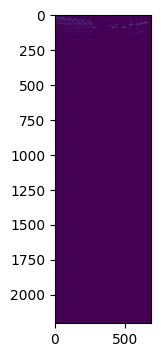

In [27]:
casove_frekvencni_matice = np.vstack(okeni_fft).T  # chceme mít čas na ose x, tedy ve sloupcích
print(f"Rozměry matice: {casove_frekvencni_matice.shape}")

plt.figure(figsize=(4, 4))
plt.imshow(casove_frekvencni_matice)
plt.show()

Na výsledném obrázku toho moc nevidíme, navíc potřebujeme správné rozsahy os. K tomu se nám bude hodit jiná vykreslovací funkce.

- spočteme příslušné hodnoty na ose x: čas od 0 do `delka_nahravky` 
- spočteme příslušné hodnoty na ose y: frekvence dle již známého vzorce `i / N * vzorkovaci_frekvence`, kde `N` je délka signalu zpracovaného pomocí FFT (ve vzorcích)
- vykreslíme obrázek pomocí funkce `plt.pcolormesh`
    - první parametr jsou hodnoty na ose x
    - druhý parametr jsou hodnoty na ose y
    - třetí parametr je matice hodnot, které chceme vykreslit
    - můžeme použít parametr `cmap` pro změnu barevného schématu

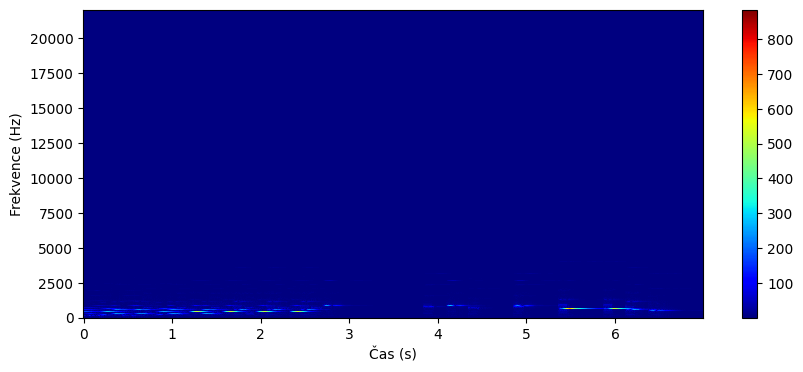

In [28]:
x_axis = np.linspace(0, delka_nahravky, pocet_oken, endpoint=False)
y_axis = np.arange(casove_frekvencni_matice.shape[0]) / velikost_okna * vzorkovaci_frekvence


plt.figure(figsize=(10, 4))
plt.pcolormesh(x_axis, y_axis, casove_frekvencni_matice, cmap='jet')
plt.colorbar()
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')
plt.show()

Skutečné frekvence hraných not jsou pouze v rozsahu do cca 4000 Hz, takže si zobrazíme pouze tento rozsah.

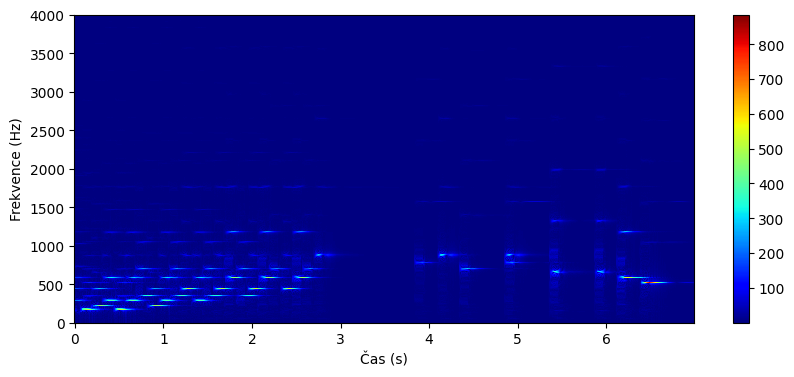

In [29]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(x_axis, y_axis, casove_frekvencni_matice, cmap='jet')

plt.colorbar()
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')

plt.ylim(0, 4000)

plt.show()

Celý process okenní Fourierovy transformace je samozřejmě implementován v knihovně `scipy` a to v modulu `signal` pod názvem `spectrogram`.

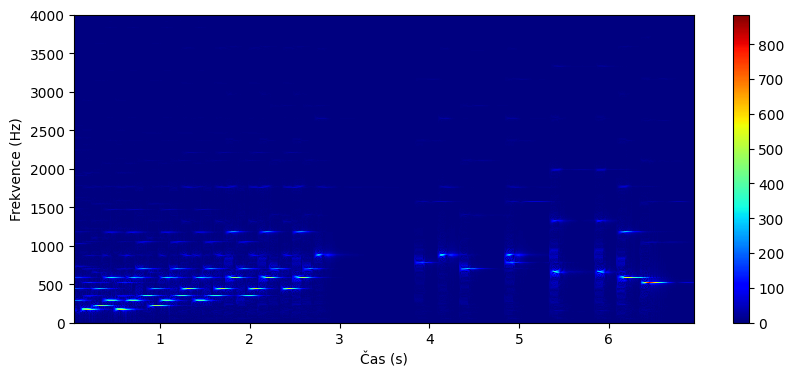

In [30]:
from scipy import signal as sgn

window = np.ones((velikost_okna,))  # pokud chceme obdélníkové okno stejné jako předtím

# výpočet spektrogramu
y_axis, x_axis, casove_frekvencni_matice = sgn.spectrogram(signal,
                                                           fs=vzorkovaci_frekvence,
                                                           window=window,
                                                           nperseg=velikost_okna,
                                                           noverlap=velikost_okna - posun_okna,
                                                           scaling='spectrum',  # přeškálování barev
                                                           mode='magnitude')  # amplituda

plt.figure(figsize=(10, 4))
plt.pcolormesh(x_axis, y_axis, casove_frekvencni_matice, cmap='jet')
plt.colorbar()
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')

plt.ylim(0, 4000)

plt.show()